<a href="https://colab.research.google.com/github/souvik9998/image-identification-using-cnn/blob/main/image_identification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/image_identification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [34]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(
        rescale=1./255)
train_dataset = train_datagen.flow_from_directory(
        'train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
test_dataset = test_datagen.flow_from_directory(
        'test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1564 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [35]:
cnn = Sequential()

cnn.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(64,64,3)))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn.add(Flatten())

cnn.add(Dense(128,activation='relu'))
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

In [36]:
cnn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [38]:
history = cnn.fit(x = train_dataset , validation_data = test_dataset , epochs = 10)

Epoch 1/10
49/49 [==============================] - 4s 86ms/step - loss: 0.2721 - accuracy: 0.9086 - val_loss: 0.3445 - val_accuracy: 0.8800
Epoch 2/10
49/49 [==============================] - 4s 84ms/step - loss: 0.2790 - accuracy: 0.9073 - val_loss: 0.3633 - val_accuracy: 0.9000
Epoch 3/10
49/49 [==============================] - 5s 96ms/step - loss: 0.1807 - accuracy: 0.9463 - val_loss: 0.2237 - val_accuracy: 0.9200
Epoch 4/10
49/49 [==============================] - 4s 83ms/step - loss: 0.1291 - accuracy: 0.9533 - val_loss: 0.2071 - val_accuracy: 0.9600
Epoch 5/10
49/49 [==============================] - 5s 102ms/step - loss: 0.1605 - accuracy: 0.9418 - val_loss: 0.2800 - val_accuracy: 0.9600
Epoch 6/10
49/49 [==============================] - 4s 89ms/step - loss: 0.1780 - accuracy: 0.9386 - val_loss: 0.3539 - val_accuracy: 0.9000
Epoch 7/10
49/49 [==============================] - 4s 85ms/step - loss: 0.1074 - accuracy: 0.9616 - val_loss: 0.4069 - val_accuracy: 0.9200
Epoch 8/10
4

In [39]:
import matplotlib.pyplot as plt

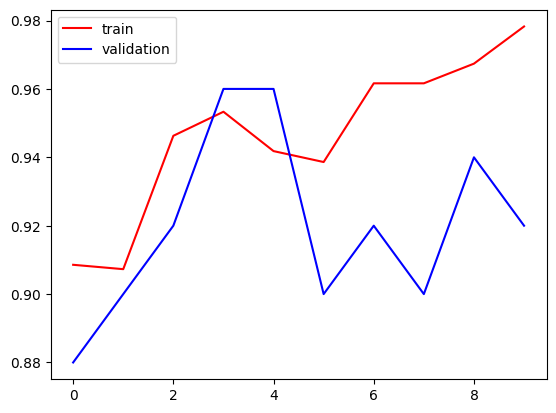

In [40]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

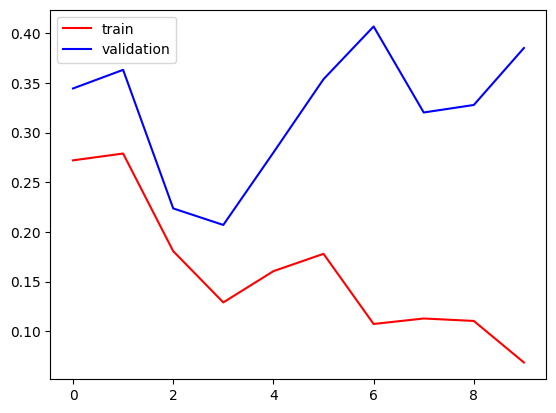

In [41]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [42]:
import numpy as np

In [43]:
train_dataset.class_indices

{'JANDAYA PARAKEET': 0,
 'JAPANESE ROBIN': 1,
 'JAVA SPARROW': 2,
 'JOCOTOCO ANTPITTA': 3,
 'KAGU': 4,
 'KAKAPO': 5,
 'KILLDEAR': 6,
 'KING EIDER': 7,
 'KING VULTURE': 8,
 'KIWI': 9}

In [44]:
import cv2;

In [45]:
test_img = cv2.imread('parakeet.jpg')

In [46]:
import matplotlib.pyplot as plt

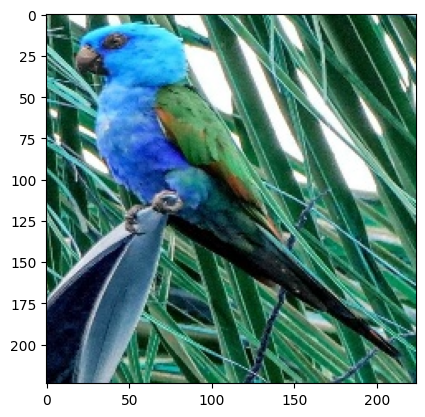

In [47]:
plt.imshow(test_img)

In [48]:
import keras.utils as image
test_image = image.load_img('parakeet.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 167ms/step


In [49]:
y_predicted = cnn.predict(test_image)
y_predicted[0]

1/1 [==============================] - 0s 18ms/step


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [50]:
cn=np.argmax(y_predicted[0])
print(cn)

0


In [51]:
if cn==0 :
    print('JANDAYA PARAKEET')
elif cn==1 :
    print('JAPANESE ROBIN')
elif cn==2 :
    print('JAVA SPARROW')
elif cn==3 :
    print('JOCOTOCO ANTPITTA')
elif cn==4 :
    print('KAGU')
elif cn==5 :
    print('KAKAPO')
elif cn==6 :
    print('KILLDEAR')
elif cn==7 :
    print('KING EIDER')
elif cn==8 :
    print('KING VULTURE')
elif cn==9 :
    print('KIWI')

JANDAYA PARAKEET
